# Roadmap

### 1. Load the Data
### 2. Visualize the Data
### 3. Pre-processing the Data
### 4. Build the Model
### 5. Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Image

# Load the Data

In [2]:
data = pd.read_csv('Dataset iris.csv') #upload csv file
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,4.3,3.0,1.1,0.1,Iris-setosa
1,7,4.4,3.0,1.3,0.2,Iris-setosa
2,8,4.4,3.2,1.3,0.2,Iris-setosa
3,11,4.4,NaN,1.4,0.2,Iris-setosa
4,30,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...,...
130,112,7.7,2.8,6.7,2.0,Iris-virginica
131,121,7.7,3.8,6.7,2.2,Iris-virginica
132,128,7.7,3.0,6.1,2.3,Iris-virginica
133,129,7.7,2.6,6.9,2.3,Iris-virginica


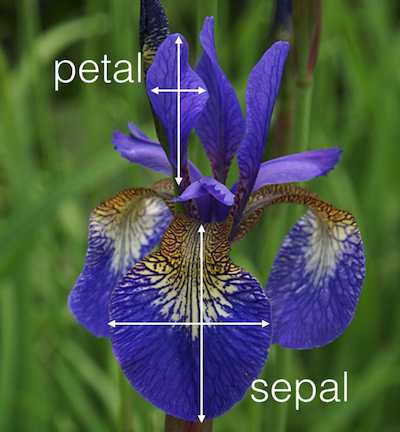

In [3]:
Image(filename='iris_petal_sepal.png') 

#### The image above shows the petal and sepal looks like

In [4]:
data.drop_duplicates(subset='Species', keep='first')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,4.3,3.0,1.1,0.1,Iris-setosa
19,79,4.9,2.4,3.3,1.0,Iris-versicolor
20,94,4.9,2.5,4.5,1.7,Iris-virginica


#### We can see there are three Species from the dataset

In [5]:
print('Jumlah Data ',len(data),'\n')
print(data.isnull().sum(axis = 0))

Jumlah Data  135 

Id               0
SepalLengthCm    5
SepalWidthCm     3
PetalLengthCm    2
PetalWidthCm     3
Species          0
dtype: int64


#### From the code above, there is 135 Data, and 13 Null Data. That means, we have to pre-processing the data before creating the model

### Data Distribution

# Visual the Data

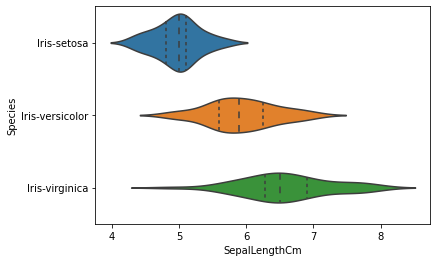

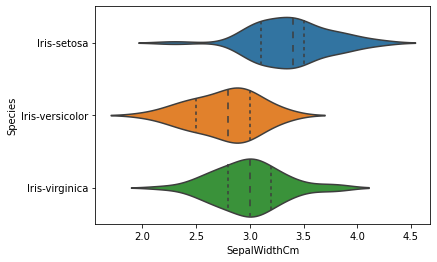

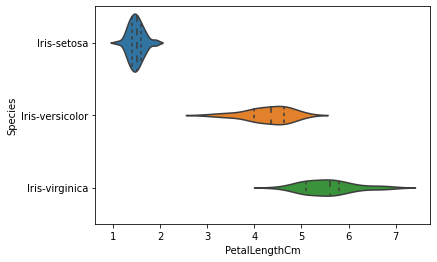

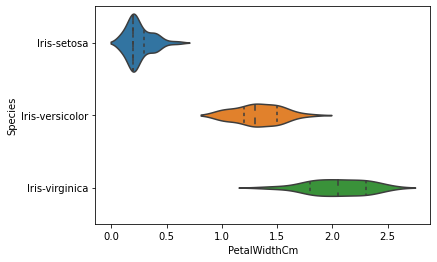

In [6]:
# Visualization the four fiture of each Species
visual = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
visual = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
visual = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
visual = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

#### The graph above shows the Sepal Length & Width, and Petal Length & Width in Cm of each Species.
#### From the graph above, we get some insight:
#### 1. Iris-setosa has a smallest Petal, and Iris-virginica has a widest Petal
#### 2. Iris-setosa has a biggest Sepal width

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


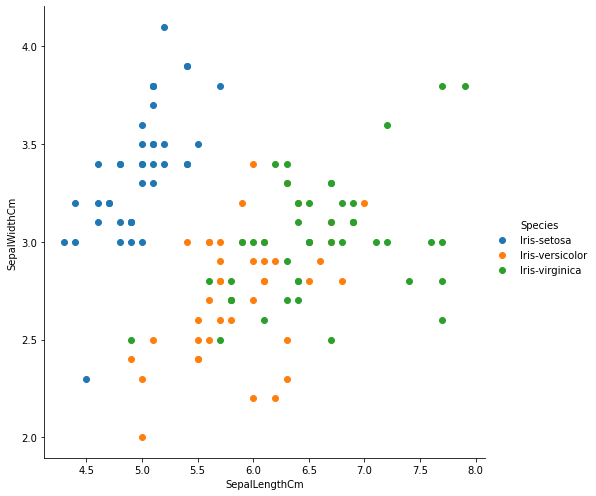

In [7]:
# Visualize with scatter plot
sns.FacetGrid(data, hue="Species", size=7) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


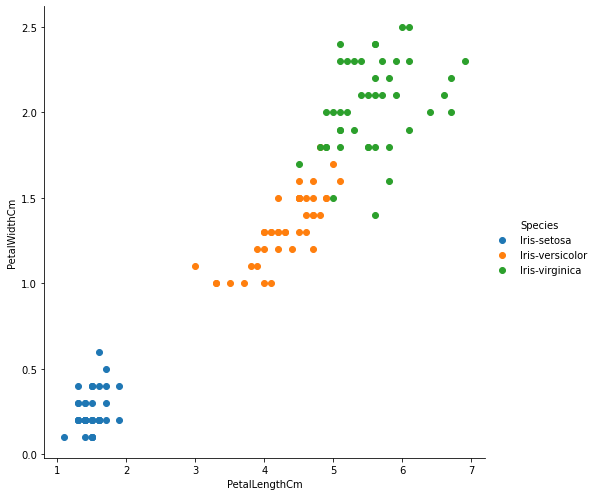

In [8]:
#melakukan visualisasi dengan menggunakan scatter plot, dengan fitur Petal
sns.FacetGrid(data, hue="Species", size=7) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

#### From these graph above, we can see which species is a smalles and the biggest one

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


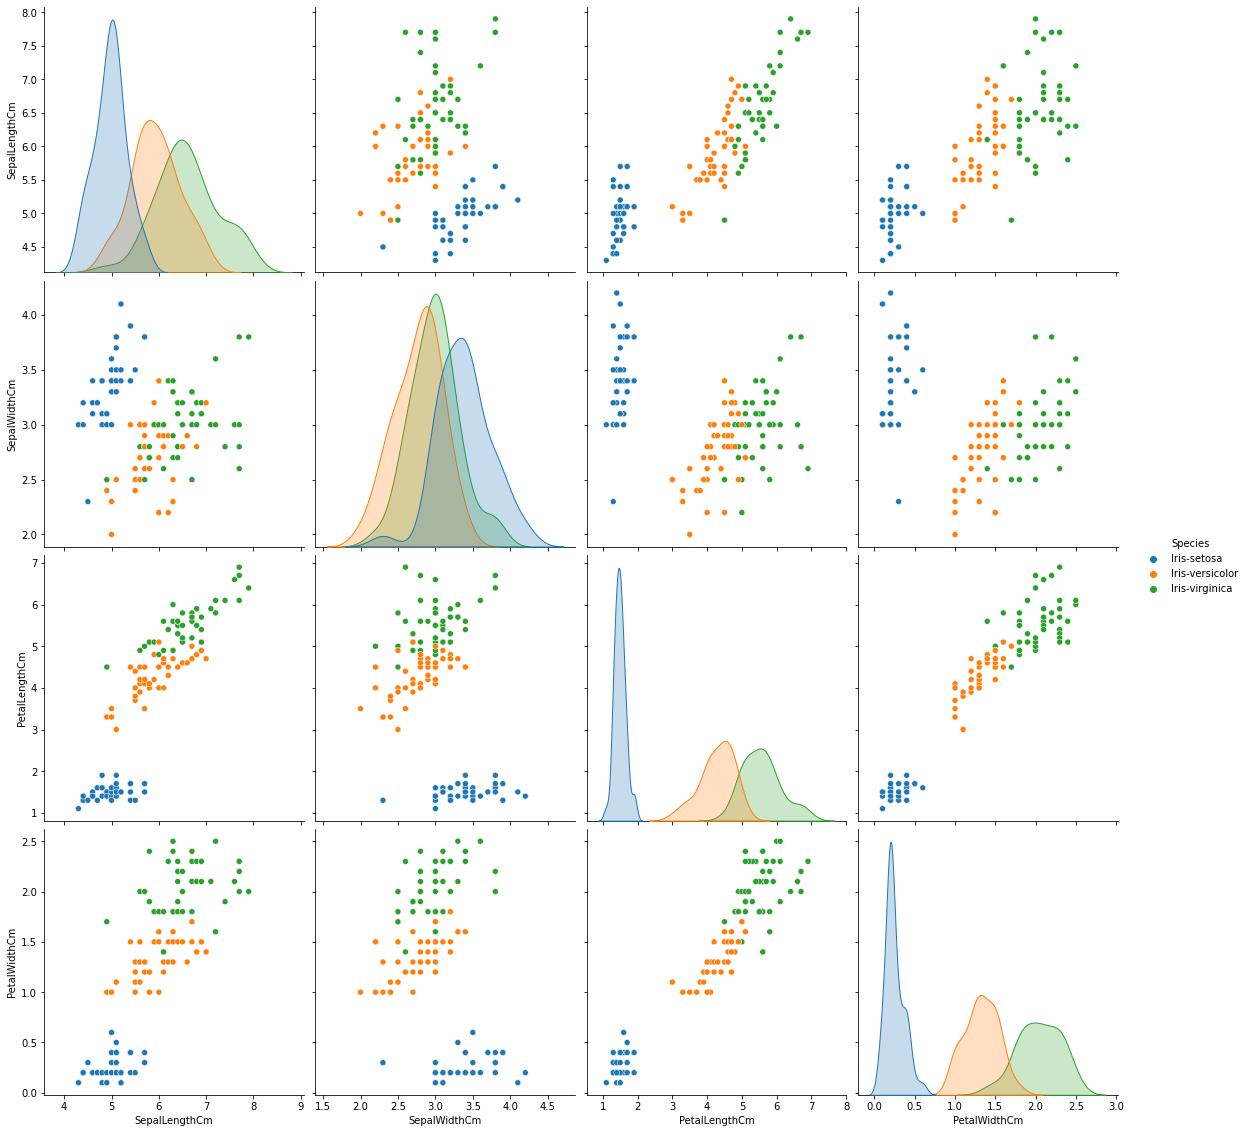

In [9]:
#Visualize those four fiture using Pair Plot
data_vis = data.drop(['Id'], axis=1)
sns.pairplot(data_vis,hue="Species",size=4);
plt.show()

### Correlation Matrix

#### Shows the correlation betwwen fitures

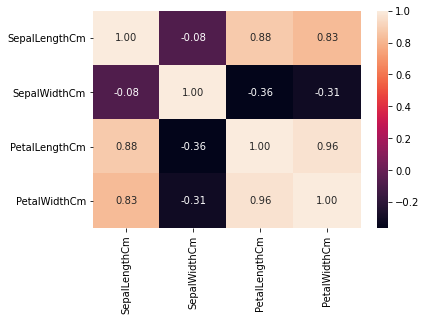

In [10]:
list1 = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] # the features to be displayed
sns.heatmap(data[list1].corr(), annot = True, fmt = '.2f')
plt.show()

# Pre-processing Data

#### Delete the rows that contain the null data

In [11]:
data = data.dropna()
print('Jumlah Data ',len(data),'\n')
print(data.isnull().sum(axis = 0))

Jumlah Data  122 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


#### Takes the X as the Features and y as the Label

In [12]:
X = data.drop(['Id', 'Species'], axis=1) #Features
y =  data.pop('Species')

print(X.shape)
print(y.shape)

(122, 4)
(122,)


In [13]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.3,3.0,1.1,0.1
1,4.4,3.0,1.3,0.2
2,4.4,3.2,1.3,0.2
4,4.5,2.3,1.3,0.3
5,4.6,3.2,1.4,0.2
...,...,...,...,...
130,7.7,2.8,6.7,2.0
131,7.7,3.8,6.7,2.2
132,7.7,3.0,6.1,2.3
133,7.7,2.6,6.9,2.3


In [14]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
Name: Species, Length: 122, dtype: object

# Build Model

#### We are using two Classifier as well, there are SVM Classifier and Logistic Regression

# SVM Classifier

In [15]:
from sklearn.svm import SVC
svn = SVC()

In [16]:
#Memisahkan data
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.33, 
random_state=42)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svn = SVC()

svn.fit(X_train, Y_train)

predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.975609756097561


#### With this classifier, we get 97,5% accuracy

In [18]:
X_new = np.array([["5.2","2.7","3.9","1.4"]])
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-versicolor']


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# Fitting Logistic Regression to the Training set
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [23]:
classifier.score(X_test,y_test)

0.967741935483871

#### With this classifier, we get 96,7% accuracy

# Prediction

#### For the prediction, we are using SVM Classifier

In [24]:
data_test = pd.read_csv('Data_iris_test.csv')
data_test = data_test.drop(['Id'], axis=1)
data_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.6,3.6,1.0,0.2
1,5.0,3.2,1.2,0.2
2,5.8,4.0,1.2,0.2
3,5.3,3.7,1.5,0.2
4,5.4,3.7,1.5,0.2


#### Takes each row data from dataframe and input it in object as array

In [25]:
array = []

for j in range(len(data_test)):
    for i in data_test.iloc[j]:
        array.append(i)

In [26]:
array = np.array(array)

In [27]:
array = np.reshape(array, (-1, 4))

#### Predict it with SVM Classifier

In [28]:
prediction = svn.predict(array)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']


#### Add a column namely Species with a prediction values

In [29]:
data_test['Species'] = prediction

## Prediction results

In [30]:
data_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.6,3.6,1.0,0.2,Iris-setosa
1,5.0,3.2,1.2,0.2,Iris-setosa
2,5.8,4.0,1.2,0.2,Iris-setosa
3,5.3,3.7,1.5,0.2,Iris-setosa
4,5.4,3.7,1.5,0.2,Iris-setosa
5,5.6,2.9,3.6,1.3,Iris-versicolor
6,5.5,2.3,4.0,1.3,Iris-versicolor
7,5.2,2.7,3.9,1.4,Iris-versicolor
8,6.6,3.0,4.4,1.4,Iris-versicolor
9,6.7,3.1,4.4,1.4,Iris-versicolor
